In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Heart_D.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


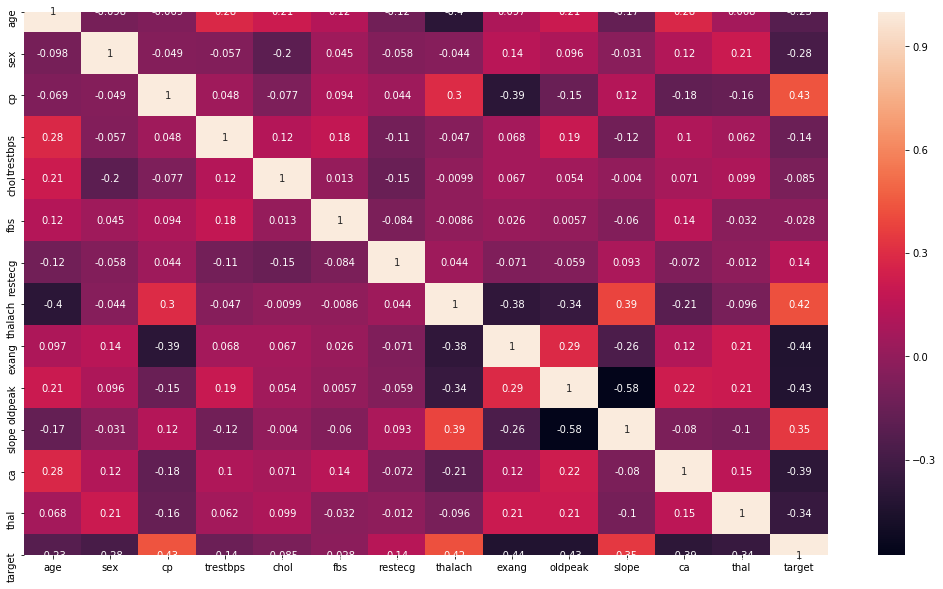

In [8]:
corr = data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

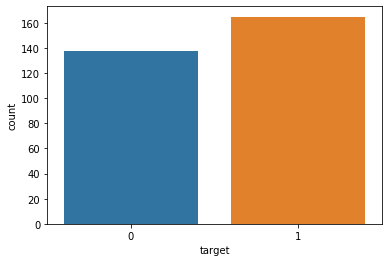

In [6]:
# Analyzing number of patients diagnosed with heart disease or without heart disease
sns.countplot(data['target'])

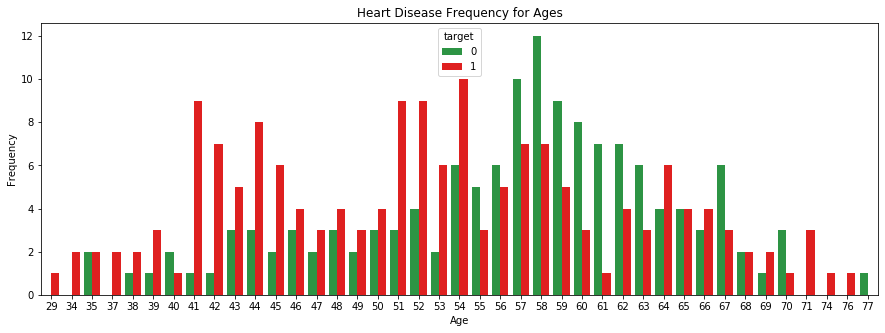

In [13]:
# Analyzing the occurence of heart disease by age
# Heart disease is most prevalent in the age group 41 to 44 and 51 to 54
plt.figure(figsize=(15, 5))
sns.countplot(x='age', hue='target', data=data, palette=['#1CA53B', 'red'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

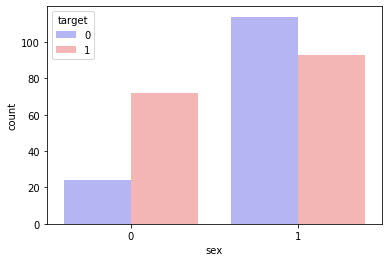

In [16]:
# Analyzing heart dieseases by gender
# Heart disease is more prevalent in females
sns.countplot(x='sex', hue='target', data=data, palette='bwr')
plt.show()

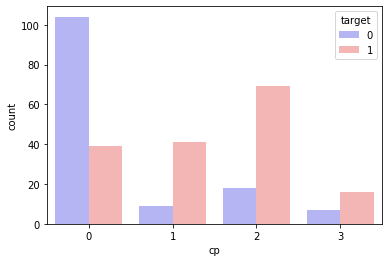

In [17]:
# Analyzing heart dieseases by cp
# Individuals with cp level 2 are most with heart disease
sns.countplot(x='cp', hue='target', data=data, palette='bwr')
plt.show()

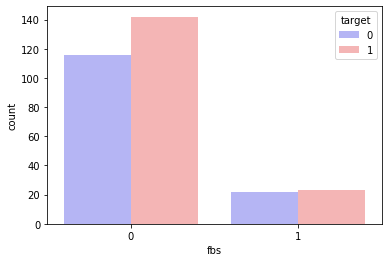

In [18]:
# Analyzing heart dieseases by fbs
# Individuals with fbs more than 120 are with heart disease
sns.countplot(x='fbs', hue='target', data=data, palette='bwr')
plt.show()

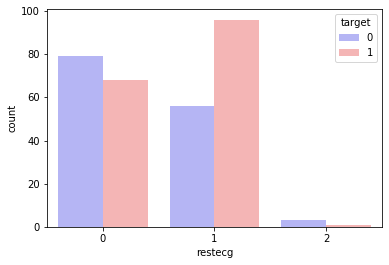

In [19]:
# Analyzing heart dieseases by resting electrocardiographic results
# Individuals with resting electrocardiographic results close to 0 and 1 are with heart disease
sns.countplot(x='restecg', hue='target', data=data, palette='bwr')
plt.show()

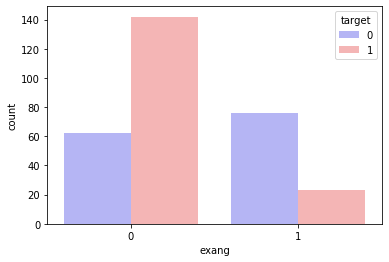

In [21]:
# Analyzing heart dieseases by exercise induced angina (1 = yes; 0 = no)
# Individuals with exercise induced angina (exang) close to 0 are with heart disease
sns.countplot(x='exang', hue='target', data=data, palette='bwr')
plt.show()

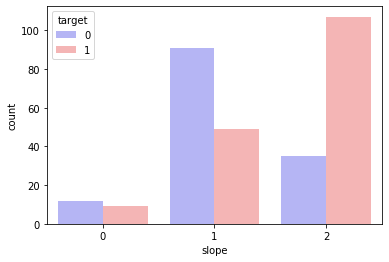

In [22]:
# Analyzing heart dieseases by the slope of the peak exercise ST segment
# Individuals with slope value 2 are with heart disease
sns.countplot(x='slope', hue='target', data=data, palette='bwr')
plt.show()

In [26]:
x = data.drop(columns=['target'])
y = data['target']

In [27]:
x.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
dtype: float64

In [30]:
# Removing skewness from data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [31]:
x.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.284837
chol        0.090242
fbs         1.986652
restecg     0.162522
thalach    -0.159233
exang       0.742532
oldpeak     0.396825
slope       0.043011
ca          0.558701
thal       -0.476722
dtype: float64

In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.810207,-0.169857,2.394438,-1.005832,-0.063213,-0.696631,1.192005,-1.477658,-0.821160,-2.148873
1,-1.915313,0.681005,1.002577,-0.030196,0.176273,-0.417635,0.898962,1.826501,-0.696631,1.784504,-1.477658,-0.821160,-0.512922
2,-1.474158,-1.468418,0.032031,-0.030196,-0.822868,-0.417635,-1.005832,1.010389,-0.696631,0.583653,1.051892,-0.821160,-0.512922
3,0.180175,0.681005,0.032031,-0.645768,-0.106985,-0.417635,0.898962,1.328650,-0.696631,0.034085,1.051892,-0.821160,-0.512922
4,0.290464,-1.468418,-0.938515,-0.645768,1.887209,-0.417635,0.898962,0.553456,1.435481,-0.190919,1.051892,-0.821160,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.540071,-0.003945,-0.417635,0.898962,-1.180309,1.435481,-0.740487,-0.845270,-0.821160,1.123029
299,-1.033002,0.681005,1.973123,-1.314469,0.444152,-0.417635,0.898962,-0.832495,-0.696631,0.417433,-0.845270,-0.821160,1.123029
300,1.503641,0.681005,-0.938515,0.756928,-1.095066,2.394438,0.898962,-0.460130,-0.696631,1.741573,-0.845270,1.359286,1.123029
301,0.290464,0.681005,-0.938515,-0.030196,-2.995480,-0.417635,0.898962,-1.468866,1.435481,0.417433,-0.845270,0.727789,1.123029


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
from sklearn.metrics import f1_score
def maxf1score(cm,x,y):
    maxf1=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=f1_score(y_test,y_pred)
        if fsc>maxf1:
            maxf1=fsc
            rs=r_state
    print("Maximum f1_score is at random state :",rs," and it is :",maxf1)

In [38]:
# Using Logistic regression
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='f1')
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.1, penalty='l2')
maxf1score(lr,x,y)

Maximum f1_score is at random state : 19  and it is : 0.9705882352941176


In [41]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for LogisticRegression score is:', cross_val_score(lr,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(lr,x,y,cv=5,scoring="f1").std())

Mean cross validation score for LogisticRegression score is: 0.8591508531758331
Standard deviation in roc_auc score is:  0.027154978983764642


In [42]:
# Using Decision Tree Classifier
dtc=DecisionTreeClassifier()
hyperparametersdtc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
griddtc=GridSearchCV(dtc, hyperparametersdtc, cv=5, scoring='f1')
griddtc.fit(x,y)
print(griddtc.best_params_)

{'criterion': 'entropy', 'max_depth': 3}


In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=3)
maxf1score(dtc,x,y)

Maximum f1_score is at random state : 117  and it is : 0.927536231884058


In [45]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Decision Tree Classifier is:', cross_val_score(dtc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(dtc,x,y,cv=5,scoring="f1").std())

Mean cross validation score for Decision Tree Classifier is: 0.8323522018778187
Standard deviation in roc_auc score is:  0.04811214890400357


In [46]:
# Using SVC
from sklearn.svm import SVC
svc=SVC()
hyperparameterssvc = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf','poly','linear']}
gridsvc=GridSearchCV(svc, hyperparameterssvc, cv=5, scoring='f1')
gridsvc.fit(x,y)
print(gridsvc.best_params_)

{'C': 0.01, 'kernel': 'linear'}


In [48]:
from sklearn.svm import SVC
svc=SVC(C=0.01, kernel='linear')
maxf1score(svc,x,y)

Maximum f1_score is at random state : 19  and it is : 0.9428571428571428


In [49]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for SVC is:', cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(svc,x,y,cv=5,scoring="f1").std())

Mean cross validation score for SVC is: 0.8666360245294721
Standard deviation in roc_auc score is:  0.03015203037063421


In [50]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parametersknn={'n_neighbors':[5,6,7,8,9,10]}
knn1 = GridSearchCV(knn, parametersknn, cv=5,scoring="f1")
knn1.fit(x,y)
knn1.best_params_

{'n_neighbors': 8}

In [52]:
knn=KNeighborsClassifier(n_neighbors=8)
maxf1score(knn,x,y)

Maximum f1_score is at random state : 13  and it is : 0.9538461538461539


In [53]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for KNN is:', cross_val_score(knn,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(knn,x,y,cv=5,scoring="f1").std())

Mean cross validation score for KNN is: 0.8534068829721004
Standard deviation in roc_auc score is:  0.02770437489489509


In [54]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parametersrfc={'n_estimators':[100,150,200,250,300]}
rfc1 = GridSearchCV(rfc, parametersrfc, cv=5,scoring="f1")
rfc1.fit(x,y)
rfc1.best_params_

{'n_estimators': 250}

In [55]:
rfc=RandomForestClassifier(n_estimators=250)
maxf1score(rfc,x,y)

Maximum f1_score is at random state : 70  and it is : 0.927536231884058


In [56]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Random Forest Classifier is:', cross_val_score(rfc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(rfc,x,y,cv=5,scoring="f1").std())

Mean cross validation score for Random Forest Classifier is: 0.8354864176768739
Standard deviation in roc_auc score is:  0.030665420567815016


In [58]:
# Among all the models, SVC is the best performing model
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 19,test_size=0.20,stratify=y)
svc=SVC(C=0.01, kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('classification_report \n', classification_report(y_test,y_pred))
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.89      1.00      0.94        33

    accuracy                           0.93        61
   macro avg       0.95      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61

Confusion matrix 
 [[24  4]
 [ 0 33]]


In [59]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(svc, 'HeartDisease_svc.pkl')

['HeartDisease_svc.pkl']